In [209]:
import mpl_toolkits
from mpl_toolkits import mplot3d
#base environment



In [210]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math as mt
import datetime
from datetime import datetime, timedelta, time

from mpl_toolkits.mplot3d import axes3d

In [180]:
#importing the data

# data = pd.read_csv('/Users/secchim/Documents/221101track_test.csv', header = 0)
data = pd.read_csv('/Users/secchim/Downloads/CellProfiler/movie_pipeline_test/KuOTrackingRemovedObjectsSPDP.csv', header = 0)
print(data)


     ImageNumber  ObjectNumber  Metadata_Channelnb  Metadata_FileLocation  \
0              1             1                 NaN                    NaN   
1              2             1                 NaN                    NaN   
2              3             1                 NaN                    NaN   
3              4             1                 NaN                    NaN   
4              5             1                 NaN                    NaN   
..           ...           ...                 ...                    ...   
857          526             1                 NaN                    NaN   
858          527             1                 NaN                    NaN   
859          528             1                 NaN                    NaN   
860          530             1                 NaN                    NaN   
861          532             1                 NaN                    NaN   

     Metadata_Format1  Metadata_Format2  Metadata_Frame  Metadata_Series  \

In [181]:
#back up #importing the metadata
metadata=pd.read_csv('/Users/secchim/Documents/221103merged_metadata_and_mice.csv')

metadata['Metadata_VWF']=(metadata['Position_Name']).str.replace('.czi_','_')
data=pd.merge(data, metadata[:], on = 'Metadata_VWF')
print(data)
# data.to_csv('/Users/secchim/Documents/221104TEST.csv')

     ImageNumber  ObjectNumber  Metadata_Channelnb  Metadata_FileLocation  \
0              1             1                 NaN                    NaN   
1              2             1                 NaN                    NaN   
2              3             1                 NaN                    NaN   
3              4             1                 NaN                    NaN   
4              5             1                 NaN                    NaN   
..           ...           ...                 ...                    ...   
857          494             1                 NaN                    NaN   
858          495             1                 NaN                    NaN   
859          496             1                 NaN                    NaN   
860          497             1                 NaN                    NaN   
861          498             1                 NaN                    NaN   

     Metadata_Format1  Metadata_Format2  Metadata_Frame  Metadata_Series  \

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_3364/902159637.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  metadata['Metadata_VWF']=(metadata['Position_Name']).str.replace('.czi_','_')


In [182]:
#TRACK ID IS UNIQUE PER CELL PER MOVIE
data['Track_ID'] = 'X'
data['Track_ID']=(data['Metadata_VWF']) +'_'+((data['Intensity_MaxIntensity_track']).astype(str))
# data.to_csv('/Users/secchim/Downloads/CellProfiler/movie_pipeline_test/KuOTrackingRemovedObjectsSPbin.csv', index=False)

#Normalize to stage position 
#because lacking imgWidth and imgHeight, normalizing to center of the image as 0 
# (meaning the absolute positions will be off by half the image size)

## Convert xPos and yPos to stage coordinates
def convertToStagePos(xPos, yPos,  imageCenterStageX, imageCenterStageY, data_name):
    CenterAsStageX = imageCenterStageX + xPos
    CenterAsStageY = imageCenterStageY + yPos
    # return CenterAsStageX, CenterAsStageY
    # print(CenterAsStageX, CenterAsStageY)
    data_name['corrected_x']=CenterAsStageX
    data_name['corrected_y']=CenterAsStageY

convertToStagePos(data['Location_Center_X'], data['Location_Center_Y'], data['Position_X'], data['Position_Y'], data)
# data['corrected_x']=CenterAsStageX
# data['corrected_y']=CenterAsStageY

print(data['corrected_x'])



# count_DP=0
# #DP/SP Hoxb5_status
# Hoxb5_cells=[]
# Hoxb5Vwf_cells=[]
# works  but will not correct for incorrectly GFP labelled cells
# for i in data.index:
#     if data['Hoxb5_status'][i] == 'DP':
#         Hoxb5Vwf_cells.append(data['Metadata_VWF'][i])

    # if len(newdf.index) <=12:
    #     print(i,'PBM')

# grouped=data.groupby(['Track_ID'])

# for i, newdf in grouped:
#     # print(i)
    
#     for i in newdf.index:
#         if newdf.Hoxb5_status == 'DP':  
#             print(i,'DP')
#             Hoxb5Vwf_cells.append(data['Metadata_VWF'][i])

# print(Hoxb5Vwf_cells)

# #CONSIDERS CELLS TO BE DP IF LABELLED AS DP IN 3 FRAMES MINIMUM
# #SHOULD PROBABLY BE DONE ON THE FINAL CELL_ID RATHER THAN TRACK ID
# count_DP=0

# #DP/SP Hoxb5_status
# Hoxb5_cells=[]
# Hoxb5Vwf_cells=[]

# grouped=data.groupby(['Track_ID'])
# print(grouped)
# for i, newdf in grouped:
#     newdf=newdf[newdf['Hoxb5_status'] == 'DP']
#     count_DP=newdf.shape[0]
#     # print(count_DP)
#     # if count_DP > (len(newdf.index))/2:
#     if count_DP > 3:
#         Hoxb5Vwf_cells.append(i) #137
# # # print(Hoxb5Vwf_cells)

# Hoxb5Vwf_list=np.unique(Hoxb5Vwf_cells)

# print(Hoxb5Vwf_list)


0      66951.038816
1      66951.582645
2      66953.674963
3      66957.107186
4      66969.018841
           ...     
857     -471.382126
858     -470.078947
859     -467.622222
860     -468.109524
861     -472.221951
Name: corrected_x, Length: 862, dtype: float64


In [183]:
#REMOVE CELLS THAT WERE NOT TRACKED IN TRACKMATE
print(data.index)
data= data[data['Intensity_MaxIntensity_track'] != 0] #worked
print(data.index)

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            852, 853, 854, 855, 856, 857, 858, 859, 860, 861],
           dtype='int64', length=862)
Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            850, 851, 852, 853, 854, 855, 857, 858, 859, 861],
           dtype='int64', length=699)


In [184]:
#CONNECT TRACKS
#BE CAREFUL NOT TO CONNECT TRACKS THAT ARE IN THE SAME MOVIE
#shouldn't happen because looking at last and first 
#having a condition: time acquisition being different => went for that one
#or having a condition: metadata_vwf being different

data['Cell_group']=data['FileID']+'_'+data['Cell_name']
# data['Final_Cell_ID']=data['Cell_group']+'_'+str(data['Intensity_MaxIntensity_track'])#not working
data['Final_Cell_ID']=data['Track_ID']

grouped=data.groupby(['Cell_group'])
stored_X=0
stored_Y=0
list_of_index=[]
dflist=[]
for i, newdf in grouped:
    # print(i)
    min, max = newdf.groupby('AcquisitionTime')['Metadata_Timepoint'].idxmin(), newdf.groupby('AcquisitionTime')['Metadata_Timepoint'].idxmax()
    #if grouped['AcquisitionTime'][min] != grouped['AcquisitionTime'][max]:
    t = []
    for mi, ma in zip(min, max):
        t += [mi, ma]
    t
    for i in range(1, len(t)-1, 2):
        # print(t[i], t[i+1])
        stored_X=data['corrected_x'][t[i]]
        stored_X1=data['corrected_x'][t[i+1]]
        stored_Y=data['corrected_x'][t[i]]
        stored_Y1=data['corrected_x'][t[i+1]]
        stored_T=data['AcquisitionTime'][t[i]]
        stored_T1=data['AcquisitionTime'][t[i+1]]
        # print(t[i], stored_X, t[i+1], stored_X1)
        if (abs(stored_X1-stored_X))<=20 and (abs(stored_Y1-stored_Y))<=20 and stored_T!=stored_T1:
            newdf['Final_Cell_ID']=newdf['Cell_group']+'_'+(str(stored_X))[:5]
            # print(newdf[‘Final_Cell_ID’])
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['Final_Cell_ID'])
# print(data)
#data.to_csv('/Users/secchim/Downloads/CellProfiler/movie_pipeline_test/checkFinalCellID.csv', index=False)


0      VWF_043_MS211126_m4-homeostasismovie_2_P12+_1....
1      VWF_043_MS211126_m4-homeostasismovie_2_P12+_1....
2      VWF_043_MS211126_m4-homeostasismovie_2_P12+_1....
3      VWF_043_MS211126_m4-homeostasismovie_2_P12+_1....
4      VWF_043_MS211126_m4-homeostasismovie_2_P12+_1....
                             ...                        
826    VWF_062_MS220421_M2_movie_P7_1.525902189314365...
827    VWF_062_MS220421_M2_movie_P7_1.525902189314365...
828    VWF_062_MS220421_M2_movie_P7_1.525902189314365...
829    VWF_062_MS220421_M2_movie_P7_1.525902189314365...
831    VWF_062_MS220421_M2_movie_P7_3.051804378628731...
Name: Final_Cell_ID, Length: 699, dtype: object


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_3364/2048919225.py:16: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


In [ ]:
# #work in progress
# grouped=data.groupby(['Cell_group'])
# stored_X=0
# stored_Y=0
# list_of_index=[]
# dflist=[]
# for i, newdf in grouped:
#     # print(i)
#     min, max = newdf.groupby('AcquisitionTime')['Metadata_Timepoint'].idxmin(), newdf.groupby('AcquisitionTime')['Metadata_Timepoint'].idxmax()
#     # if newdf['AcquisitionTime'][min] != newdf['AcquisitionTime'][max]:
#         # print(newdf['Track_ID'])
#     # print(i, newdf['AcquisitionTime'][min], newdf['AcquisitionTime'][max])
#     if (newdf['Metadata_VWF'][min])!=(newdf['Metadata_VWF'][max]):
#         print(i, newdf['Metadata_VWF'][min], newdf['Metadata_VWF'][max])

# # ValueError: Can only compare identically-labeled Series objects

#DOESN'T SEEM TO WORK?
# grouped=data.groupby(['Cell_group'])
# dflist=[]
# # print(grouped) #grouped by Cell_group, should it be grouped by Final_Cell_ID? 
# #can't be grouped by Final_Cell_ID because it is not shared by all timeframes
# for i, newdf in grouped:
#     newdf2=newdf[newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()]
#     norm_x=newdf2['Final_Cell_ID']
#     newdf['Final_Cell_ID']=norm_x
#     print(newdf['Final_Cell_ID'])


# dflist=[]
# print(grouped)
# for i, newdf in grouped:
#     newdf2=newdf[newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).max()]
#     norm_x=newdf2['Final_Cell_ID']
#     newdf['Final_Cell_ID']=norm_x
#     print(newdf['Final_Cell_ID'])

#NORMALIZING POSITIONS TO THE FIRST COORDINATES
#do on the unique Cell_ID rather than Track_ID
#PROBLEM OF I DONT HAVE THE Z FOR THE STAGE POSITION
# data['corrected_x_2']=data['Location_Center_X']
# data['corrected_y_2']=data['Location_Center_Y']
# data['corrected_z_2']=data['Location_Center_Z']
# data['norm_x']=0
# grouped=data.groupby(['Track_ID'])

# dflist=[]
# print(grouped)
# for i, newdf in grouped:
#     newdf2=newdf[newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()]#or '0'?
#     norm_x=newdf2['Location_Center_X'].values
#     norm_y=newdf2['Location_Center_Y'].values
#     norm_z=newdf2['Location_Center_Z'].values

#     newdf['norm_x']=[norm_x[0]]*len(newdf)#you could create pd.Series
#     # print(newdf['norm_x'])
#     newdf['corrected_x_2']=((newdf['Location_Center_X']-newdf['norm_x'])*(newdf['Scale_X'])*1000000)
#     # print(newdf['corrected_x_2'])
#     newdf['norm_y']=[norm_y[0]]*len(newdf)#you could create pd.Series
#     newdf['corrected_y_2']=((newdf['Location_Center_Y']-newdf['norm_y'])*(newdf['Scale_Y'])*1000000)
#     newdf['norm_z']=[norm_z[0]]*len(newdf)#you could create pd.Series
#     newdf['corrected_z_2']=((newdf['Location_Center_Z']-newdf['norm_z'])*(newdf['Scale_Z'])*1000000)
#     dflist.append(newdf)
# data=pd.concat(dflist)
# print(data)

In [185]:
#NORMALIZING POSITIONS TO THE FIRST COORDINATES
#do on the unique Cell_ID rather than Track_ID
#PROBLEM OF I DONT HAVE THE Z FOR THE STAGE POSITION
data['corrected_x_2']=data['Location_Center_X']
data['corrected_y_2']=data['Location_Center_Y']
data['corrected_z_2']=data['Location_Center_Z']
data['norm_x']=0
grouped=data.groupby(['Track_ID'])

dflist=[]
print(grouped)
for i, newdf in grouped:
    newdf2=newdf[newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()]#or '0'?
    norm_x=newdf2['Location_Center_X'].values
    norm_y=newdf2['Location_Center_Y'].values
    norm_z=newdf2['Location_Center_Z'].values

    newdf['norm_x']=[norm_x[0]]*len(newdf)#you could create pd.Series
    # print(newdf['norm_x'])
    newdf['corrected_x_2']=((newdf['Location_Center_X']-newdf['norm_x'])*(newdf['Scale_X'])*1000000)
    # print(newdf['corrected_x_2'])
    newdf['norm_y']=[norm_y[0]]*len(newdf)#you could create pd.Series
    newdf['corrected_y_2']=((newdf['Location_Center_Y']-newdf['norm_y'])*(newdf['Scale_Y'])*1000000)
    newdf['norm_z']=[norm_z[0]]*len(newdf)#you could create pd.Series
    newdf['corrected_z_2']=((newdf['Location_Center_Z']-newdf['norm_z'])*(newdf['Scale_Z'])*1000000)
    dflist.append(newdf)
data=pd.concat(dflist)
print(data)

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_3364/3767451163.py:12: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


     ImageNumber  ObjectNumber  Metadata_Channelnb  Metadata_FileLocation  \
0              1             1                 NaN                    NaN   
1              2             1                 NaN                    NaN   
2              3             1                 NaN                    NaN   
3              4             1                 NaN                    NaN   
4              5             1                 NaN                    NaN   
..           ...           ...                 ...                    ...   
826          559             1                 NaN                    NaN   
827          560             1                 NaN                    NaN   
828          561             1                 NaN                    NaN   
829          562             1                 NaN                    NaN   
831          564             1                 NaN                    NaN   

     Metadata_Format1  Metadata_Format2  Metadata_Frame  Metadata_Series  \

In [186]:
#time per timepoint

#https://docs.python.org/3/library/datetime.html#timedelta-objects
data['Timeframe_Time']=data['AcquisitionTime']
for i in data.index:
    # tpt=data['Metadata_Timepoint'][i]
    # print(tpt)
    # data['Timeframe_Time']=data['AcquisitionTime'][i]+ datetime.timedelta(minutes=tpt *3)
    # print(data['Timeframe_Time'])
    # print(datetime.time(data['AcquisitionTime'][i]))
    #worked
    data['Timeframe_Time'][i]=(datetime.fromisoformat(data['AcquisitionDate'][i]+' '+data['AcquisitionTime'][i]))+timedelta(minutes=int(3*(data['Metadata_Timepoint'][i])))
    #didnt work
    # data['Timeframe_Time']=(data['Timeframe_Time'][i])+timedelta(minutes=int(3*(data['Metadata_Timepoint'][i])))
    #worked
    #  data['Timeframe_Time']=(time.fromisoformat(data['AcquisitionTime'][i]))
    #didnt work 
    # data['Timeframe_Time']=(data['Timeframe_Time'][i])+(timedelta(minutes=int(3*(data['Metadata_Timepoint'][i]))))

print(data['Timeframe_Time'])

0      2021-11-26 14:42:57
1      2021-11-26 14:45:57
2      2021-11-26 14:48:57
3      2021-11-26 14:51:57
4      2021-11-26 14:54:57
              ...         
826    2022-04-21 17:56:20
827    2022-04-21 17:59:20
828    2022-04-21 18:02:20
829    2022-04-21 18:05:20
831    2022-04-21 18:11:20
Name: Timeframe_Time, Length: 699, dtype: object


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_3364/1027572566.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Timeframe_Time'][i]=(datetime.fromisoformat(data['AcquisitionDate'][i]+' '+data['AcquisitionTime'][i]))+timedelta(minutes=int(3*(data['Metadata_Timepoint'][i])))


In [187]:

grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    newdf=newdf.sort_values(by=['Timeframe_Time'])
    print(newdf['Timeframe_Time'])
    dflist.append(newdf)
data=pd.concat(dflist)   


data["corrected_x_2_next"] = data["corrected_x_2"].shift(-1)
data["corrected_y_2_next"] = data["corrected_y_2"].shift(-1)
data["corrected_z_2_next"] = data["corrected_z_2"].shift(-1)
print(data["corrected_x_2_next"], data ["corrected_x_2"])

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_3364/4121888034.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


0     2021-11-26 14:42:57
1     2021-11-26 14:45:57
2     2021-11-26 14:48:57
3     2021-11-26 14:51:57
4     2021-11-26 14:54:57
5     2021-11-26 14:57:57
6     2021-11-26 15:00:57
7     2021-11-26 15:03:57
8     2021-11-26 15:06:57
9     2021-11-26 15:09:57
10    2021-11-26 15:12:57
11    2021-11-26 15:15:57
12    2021-11-26 15:18:57
13    2021-11-26 15:21:57
14    2021-11-26 15:24:57
Name: Timeframe_Time, dtype: object
15    2021-11-26 15:30:57
Name: Timeframe_Time, dtype: object
16    2021-11-26 14:42:57
17    2021-11-26 14:45:57
18    2021-11-26 14:48:57
19    2021-11-26 14:51:57
20    2021-11-26 14:54:57
21    2021-11-26 14:57:57
36    2021-11-26 15:00:57
37    2021-11-26 15:03:57
38    2021-11-26 15:06:57
22    2021-11-26 15:09:57
23    2021-11-26 15:12:57
24    2021-11-26 15:15:57
25    2021-11-26 15:18:57
26    2021-11-26 15:21:57
27    2021-11-26 15:24:57
28    2021-11-26 15:27:57
29    2021-11-26 15:30:57
30    2021-11-26 15:33:57
31    2021-11-26 15:36:57
33    2021-11-26 1

In [188]:
import math #if import math not loaded this cell won't work

#annotate the last timeframe 
data["Last_timepoint"]=True
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    if newdf.shape[0]>=2:
        for b, r in newdf.iterrows():
            if (newdf.loc[b, "Timeframe_Time"])== (newdf['Timeframe_Time'].max()):
                newdf.loc[b, "Last_timepoint"]=True
            else:
                newdf.loc[b, "Last_timepoint"]=False
    dflist.append(newdf)
data=pd.concat(dflist)              
# print(data)

# calculate distance between timeframes
data['distance']=0
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    if newdf.shape[0]>=2:
        for b, r in newdf.iterrows():
            if (newdf.loc[b, 'Last_timepoint'])== False: 
                # print(b, newdf.loc[b, "Timeframe_Time"], newdf.loc[b,'Final_Cell_ID'], newdf.loc[b,'Metadata_Timepoint'], newdf.shape[0]-1)
                # try:
                newdf.loc[b, "distance"]=(math.sqrt((newdf.loc[b, "corrected_x_2"]-newdf.loc[b, "corrected_x_2_next"])**2+(newdf.loc[b, "corrected_y_2"]-newdf.loc[b, "corrected_y_2_next"])**2+(newdf.loc[b, "corrected_z_2"]-newdf.loc[b, "corrected_z_2_next"])**2))
                    # newdf["distance"]=(math.sqrt((newdf["corrected_x_2"][r]-newdf["corrected_x_2"][r+1])**2+(newdf["corrected_y_2"][r]-newdf["corrected_y_2"][r+1])**2+(newdf["corrected_z_2"][r]-newdf["corrected_z_2"][r+1])**2))
                # except:
                    # print(i, b, "error")
                    # newdf.loc[b, "distance"]='NaN'
                    # pass
        # print(newdf["distance"])
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['distance'])
#.sort_values(by=['Timeframe_Time']).reset_index()




/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_3364/489014989.py:7: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_3364/489014989.py:22: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


0      2.482469
1      2.534995
2      2.654629
3      8.697048
4      6.529816
         ...   
826    1.570461
827    2.598981
828    1.726194
829    0.000000
831    0.000000
Name: distance, Length: 699, dtype: float64


In [189]:
#Calculate track length
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    newdf['track_length']=newdf['distance'].sum()
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['track_length'])   

0      55.314248
1      55.314248
2      55.314248
3      55.314248
4      55.314248
         ...    
826    37.926482
827    37.926482
828    37.926482
829    37.926482
831     0.000000
Name: track_length, Length: 699, dtype: float64


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_3364/517642801.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


In [190]:
#calculate displacement for every timepoint
data['displacement']=0
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    stored_X0=newdf['corrected_x_2'][newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()]
    stored_Y0=newdf['corrected_y_2'][newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()]
    stored_Z0=newdf['corrected_z_2'][newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()]
    for b, r in newdf.iterrows():
        newdf.loc[b, "displacement"]=math.sqrt((newdf["corrected_x_2"][b]-stored_X0)**2+(newdf["corrected_y_2"][b]-stored_Y0)**2+(newdf["corrected_z_2"][b]-stored_Z0)**2)
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['displacement'])


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_3364/1785817353.py:5: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


0       0.000000
1       2.482469
2       4.938715
3       7.247411
4      15.660268
         ...    
826     5.097982
827     6.395151
828     7.583338
829     5.916740
831     0.000000
Name: displacement, Length: 699, dtype: float64


In [191]:
#maximum displacement
data['max_displacement']=0
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    newdf['max_displacement']=newdf['displacement'].max()
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['max_displacement'])


0      22.207839
1      22.207839
2      22.207839
3      22.207839
4      22.207839
         ...    
826     7.583338
827     7.583338
828     7.583338
829     7.583338
831     0.000000
Name: max_displacement, Length: 699, dtype: float64


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_3364/3433977904.py:5: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


In [205]:
#mean speed in um/sec
#potentially wrong
#gives NaN for cells that have only one timepoint so these cells were removed in the if statement


data['mean_speed']=0
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    if newdf.shape[0]>=2:
        mean_speed=newdf['track_length']/((newdf['Timeframe_Time'].max()-newdf['Timeframe_Time'].min()).total_seconds())
        newdf['mean_speed']=mean_speed
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['mean_speed'])


0      0.021950
1      0.021950
2      0.021950
3      0.021950
4      0.021950
         ...   
826    0.007266
827    0.007266
828    0.007266
829    0.007266
831    0.000000
Name: mean_speed, Length: 699, dtype: float64


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_3364/2040277533.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


In [193]:
data["Timeframe_Time_next"] = data["Timeframe_Time"].shift(-1)

In [194]:
#frame speed
data=data.drop_duplicates() #why do I have duplicates?
data['frame_speed']=0
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    if newdf.shape[0]>=2:
        for b, r in newdf.iterrows():
            if (newdf.loc[b, 'Last_timepoint'])== False: 
            #if newdf.loc[b,'displacement']>0 and newdf.loc[b+1, 'displacement']>0:
            # try:
                newdf.loc[b, "frame_speed"]=abs(newdf.loc[b,'displacement']/((newdf.loc[b,'Timeframe_Time']-newdf.loc[(b),'Timeframe_Time_next']).total_seconds()))
            # except:
                # newdf.loc[b, "frame_speed"]='NaN'
            # print(b, newdf["frame_speed"])
                # pass
            # else:
                # print(b, 'error')
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['frame_speed'])


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_3364/3253203277.py:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


0      0.000000
1      0.013791
2      0.027437
3      0.040263
4      0.087001
         ...   
826    0.028322
827    0.035529
828    0.042130
829    0.000000
831    0.000000
Name: frame_speed, Length: 699, dtype: float64


In [195]:
#linearity coefficient

data['linearity_coefficient']=0
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    newdf['linearity_coefficient']=newdf['track_length']/newdf['max_displacement']
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['linearity_coefficient'])


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_3364/620735175.py:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


0      2.490753
1      2.490753
2      2.490753
3      2.490753
4      2.490753
         ...   
826    5.001291
827    5.001291
828    5.001291
829    5.001291
831         NaN
Name: linearity_coefficient, Length: 699, dtype: float64


In [196]:
#arrest coefficient
#speed<2/60um/sec

# data=data.dropna(axis=0)
#First classifying timeframes as arrested or not
data['arrested']=False
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    for b, r in newdf.iterrows():
        # print((newdf.loc[b,'mean_speed']),2/60, b)
        # print(newdf.loc[b])
        if (newdf.loc[b,'frame_speed'])!='NaN' and (newdf.loc[b,'frame_speed'])<(2/60):
            newdf.loc[b,'arrested']=True
        else :
            newdf.loc[b,'arrested']=False
    dflist.append(newdf)
dataX=pd.concat(dflist)
print(dataX['arrested'])

# LOTS OF DUPLICATES CREATED? WHEN ? #I think because of df list in the wrong place
datax=data.drop_duplicates()

dataX['arrest_coefficient']=False
dataX=dataX.drop_duplicates()
grouped=dataX.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    newdf2=newdf[newdf['arrested']==True]
    newdf3=newdf[newdf['arrested']==False]
    # print(newdf2['arrested'].shape[0],newdf3['arrested'].shape[0])
    if ((newdf2.shape[0])+(newdf3.shape[0]))>1:
        newdf['arrest_coefficient']=(newdf2.shape[0])/((newdf2.shape[0])+(newdf3.shape[0]))
    dflist.append(newdf)
datax=pd.concat(dflist)
print(datax['arrest_coefficient'])

# datax.to_csv('/Users/secchim/Downloads/CellProfiler/movie_pipeline_test/arrest_coef.csv')

# #   for b, r in newdf.iterrows(): 
# #         # print(b)
# #         try:
# #             newdf.loc[b, "distance"]=(math.sqrt((newdf["corrected_x_2"][b]-newdf["corrected_x_2"][b+1])**2+(newdf["corrected_y_2"][b]-newdf["corrected_y_2"][b+1])**2+(newdf["corrected_z_2"][b]-newdf["corrected_z_2"][b+1])**2))
# #             # newdf["distance"]=(math.sqrt((newdf["corrected_x_2"][r]-newdf["corrected_x_2"][r+1])**2+(newdf["corrected_y_2"][r]-newdf["corrected_y_2"][r+1])**2+(newdf["corrected_z_2"][r]-newdf["corrected_z_2"][r+1])**2))
        

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_3364/965592017.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


0       True
1       True
2       True
3      False
4      False
       ...  
826     True
827    False
828    False
829     True
831     True
Name: arrested, Length: 699, dtype: bool


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_3364/965592017.py:28: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


0      0.266667
1      0.266667
2      0.266667
3      0.266667
4      0.266667
         ...   
826    0.866667
827    0.866667
828    0.866667
829    0.866667
831       False
Name: arrest_coefficient, Length: 699, dtype: object


In [232]:
#PLOTTING RESULTS of track length
# 
import statistics
import seaborn as sns

datax=data
# datax= pd.read_csv("/Users/secchim/Downloads/CellProfiler/movie_pipeline_test/arrest_coef.csv", header = 0)
# std=(statistics.stdev(datax[datax['Treatment']=='homeostasis']['arrest_coefficient']), (statistics.stdev(datax[datax['Treatment']=='plt_depletion']['arrest_coefficient'])))
# print(std)

# fig, ax=plt.subplots()
# for key, group in datax.groupby('Final_Cell_ID'):
#     group.plot(x=('Hoxb5_status', 'Treatment'), y='arrest_coefficient', yerr=std, label=key, ax=ax)
# plt.show()
# qual=datax.groupby("Final_Cell_ID").mean()
# qual.plot(kind='barh', y='arrest_coefficient', legend=False, yerr=std, color='green')
# datax.groupby("Treatment").agg([np.mean,np.std])
# prices=datax['track_length']
# prices.plot(kind="barh", y="mean", legend=False)


# https://datavizpyr.com/boxplots-with-points-using-seaborn-in-python/
#https://seaborn.pydata.org/generated/seaborn.stripplot.html
datab=datax[['Final_Cell_ID', 'Treatment', 'Hoxb5_status', 'track_length']]
# datay=datax.groupby("Final_Cell_ID").agg([np.mean,np.std])
# print(datay)
# print(datab)

# dx=datax.groupby(['Final_Cell_ID'])
# print(dx)
# for grouping_item, grouped_df in dx:
    # sns.boxplot(x=("Treatment"), hue='Hoxb5_status', y="track_length", data=grouped_df)
    # sns.stripplot(x=("Treatment"),hue='Hoxb5_status', y="track_length", data=grouped_df, dodge=True, color='black', alpha=0.3)
# print(len(datab))

df_list =[]
grouped=datab.groupby(['Final_Cell_ID'])
for i, newdf in grouped:
    if len(newdf.index) >=18:
        df_list.append(newdf)
        print(i)
datab=pd.concat(df_list)
# print(len(datab))


dx=datab.drop_duplicates()
dx=dx[dx['track_length']!=0]

# print(dx)
# sns.boxplot(x=("Treatment"), hue='Hoxb5_status', y="track_length", data=dx)
# sns.stripplot(x=("Treatment"),hue='Hoxb5_status', y="track_length", data=dx, dodge=True, color='black', alpha=0.3)


VWF_043_MS211126_m4-homeostasismovie_2_P1<3_1.5259021893143654e-05
VWF_043_MS211126_m4-homeostasismovie_2_P7++_3.051804378628731e-05
VWF_048_MS220118_M3_movie2homeostasis_P12+_1.5259021893143654e-05
VWF_048_MS220118_M3_movie2homeostasis_P6DP+_1.5259021893143654e-05
VWF_048_MS220118_M3_movie4plt_P27+_1.5259021893143654e-05
VWF_048_MS220118_M3_movie4plt_P6DP+_1.5259021893143654e-05
VWF_048_MS220118_M3_movie4plt_P6DP+_7.629510946571827e-05
VWF_049_MS220201_M1_Snap_movie5depletion_P152kuo_1.5259021893143654e-05
VWF_053_MS220209_M1_movie2homeostasis_P14partlygreen_1.5259021893143654e-05
VWF_053_MS220209_M1_movie2homeostasis_P14partlygreen_3.051804378628731e-05
VWF_053_MS220209_M1_movie2homeostasis_P16DP_1.5259021893143654e-05
VWF_053_MS220209_M1_movie2homeostasis_P18kuo_1.5259021893143654e-05
VWF_053_MS220209_M1_movie2homeostasis_P24kuomk_1.5259021893143654e-05
VWF_053_MS220209_M1_movie2homeostasis_P26kuovascu_1.5259021893143654e-05
VWF_062_MS220421_M2_movie_P4_1.5259021893143654e-05
VWF_06

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_3364/1564659670.py:38: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


699
373
                                         Final_Cell_ID      Treatment  \
16   VWF_043_MS211126_m4-homeostasismovie_2_P1<3_1....  plt_depletion   
36   VWF_043_MS211126_m4-homeostasismovie_2_P1<3_1....  plt_depletion   
39   VWF_043_MS211126_m4-homeostasismovie_2_P7++_3....  plt_depletion   
72   VWF_043_MS211126_m4-homeostasismovie_2_P7++_3....  plt_depletion   
88   VWF_048_MS220118_M3_movie2homeostasis_P12+_1.5...    homeostasis   
174  VWF_048_MS220118_M3_movie2homeostasis_P6DP+_1....    homeostasis   
153  VWF_048_MS220118_M3_movie2homeostasis_P6DP+_1....    homeostasis   
280  VWF_048_MS220118_M3_movie4plt_P27+_1.525902189...  plt_depletion   
306  VWF_048_MS220118_M3_movie4plt_P6DP+_1.52590218...  plt_depletion   
417  VWF_048_MS220118_M3_movie4plt_P6DP+_7.62951094...  plt_depletion   
525  VWF_049_MS220201_M1_Snap_movie5depletion_P152k...  plt_depletion   
589  VWF_053_MS220209_M1_movie2homeostasis_P14partl...    homeostasis   
590  VWF_053_MS220209_M1_movie2homeostasis_

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_3364/2617111642.py:8: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/opt/anaconda3/envs/New_environment220920/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Treatment', ylabel='max_displacement'>

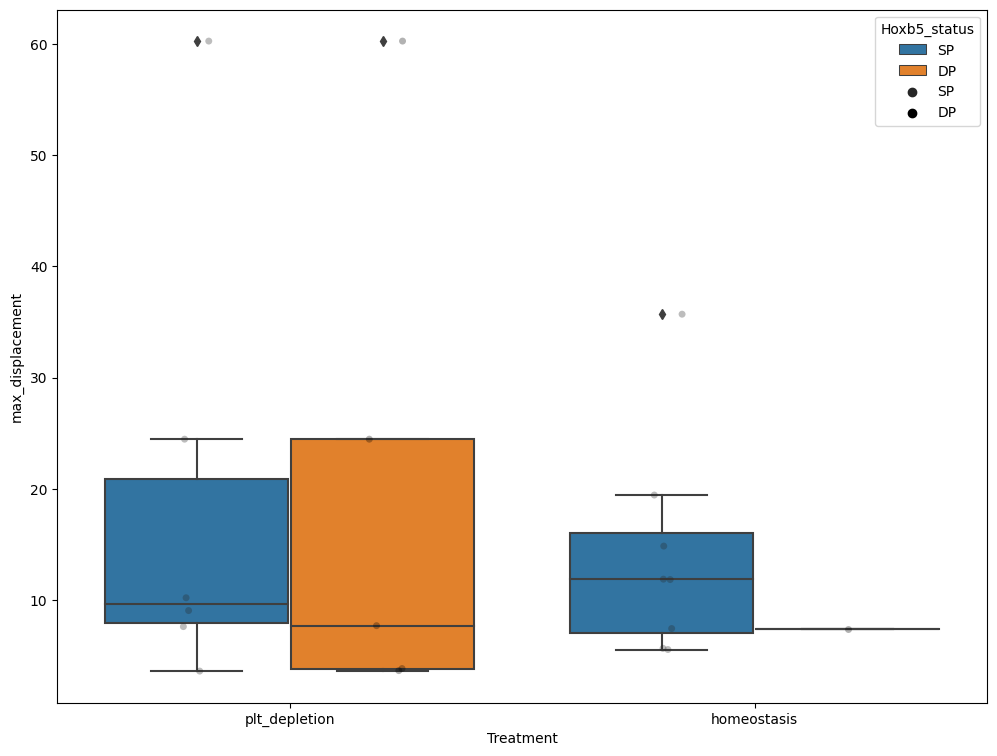

In [230]:
#PRINT MAXIMUM DISPLACEMENT

datab=datax[['Final_Cell_ID', 'Treatment', 'Hoxb5_status', 'max_displacement']]
# print(len(datab))

df_list =[]
grouped=datab.groupby(['Final_Cell_ID'])
for i, newdf in grouped:
    if len(newdf.index) >=18:
        print(i)
        df_list.append(newdf)
datab=pd.concat(df_list)
# print(len(datab))
# datay=datax.groupby("Final_Cell_ID").agg([np.mean,np.std])
# print(datay)
# print(datab)

# dx=datax.groupby(['Final_Cell_ID'])
# print(dx)
# for grouping_item, grouped_df in dx:
    # sns.boxplot(x=("Treatment"), hue='Hoxb5_status', y="track_length", data=grouped_df)
    # sns.stripplot(x=("Treatment"),hue='Hoxb5_status', y="track_length", data=grouped_df, dodge=True, color='black', alpha=0.3)

dx=datab.drop_duplicates()
dx=dx[dx['max_displacement']!=0]
# print(dx)
sns.boxplot(x=("Treatment"), hue='Hoxb5_status', y="max_displacement", data=dx)
sns.stripplot(x=("Treatment"),hue='Hoxb5_status', y="max_displacement", data=dx, dodge=True, color='black', alpha=0.3)


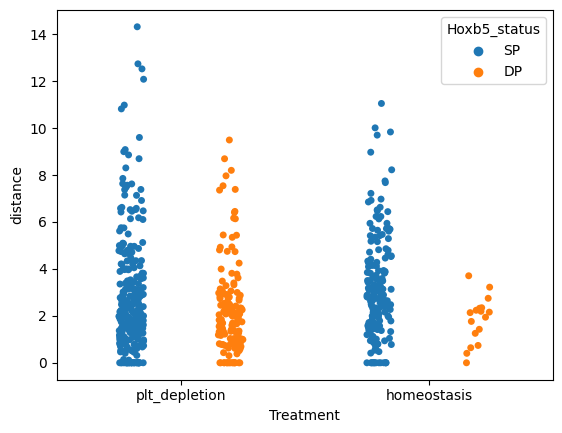

In [200]:
#QC plot
# 
dx=datax[datax['max_displacement']!=0]
sns.stripplot(x=("Treatment"),hue='Hoxb5_status', y="distance", data=dx, dodge=True)
dx.to_csv('/Users/secchim/Downloads/CellProfiler/movie_pipeline_test/qc.csv')


In [1]:
# pip install git+git://github.com/cytomining/pycytominer@2aa8638d7e505ab510f1d5282098dd59bb2cb470

# import scipy
# from scipy import stats
import pycytominer
# pip install scipy=1.4.1 #had 1.9.1

In [61]:
#Feature selection using pycytominer
#back up #importing the metadata
metadata=pd.read_csv('/Users/secchim/Documents/221103merged_metadata_and_mice.csv')
metadata['Metadata_VWF']=(metadata['Position_Name']).str.replace('.czi_','_')
Pdata = pd.read_csv('/Users/secchim/Downloads/CellProfiler/movie_pipeline_test/KuOTrackingRemovedObjectsSPDP.csv', header = 0)
# print(Pdata)

#REMOVE THE METADATA COLUMNS AND COLUMNS THAT HAVE STRINGS IN THEIR VALUES
df_temp=Pdata.iloc[:,23:-1]
col_list=df_temp.columns.values.tolist()
# print(col_list)
# print(df_temp)
#problem Hoxb5_status not in metadata
# df_temp['Metadata_Hoxb5_status']=df_temp['Hoxb5_status']
#will need to remove the Hoxb5_status column 
# print(df_temp)

# df_norm = pycytominer.normalize(df_temp, method = 'mad_robustize', mad_robustize_epsilon = 0, samples = "Metadata_Compound == 'DMSO'") 
df_selected = pycytominer.feature_select(df_temp, operation = ['correlation_threshold', 'variance_threshold', 'drop_na_columns', 'blocklist','drop_outliers'], outlier_cutoff = 500, features=col_list)
print('How many columns were dropped?',df_temp.shape[1] - df_selected.shape[1])

# df_temp=pycytominer.annotate(Pdata, metadata, join_on=['Metadata_VWF','Metadata_VWF'])

How many columns were dropped? 65


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_10739/3050780689.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  metadata['Metadata_VWF']=(metadata['Position_Name']).str.replace('.czi_','_')


In [ ]:
# #calculate distance between timeframes

# data['distance']=0
# grouped=data.groupby(['Final_Cell_ID'])
# dflist=[]
# for i, newdf in grouped:
#     for b, r in newdf.iterrows(): 
#         # print(b)
#         try:
#             newdf.loc[b, "distance"]=(math.sqrt((newdf["corrected_x_2"][b]-newdf["corrected_x_2"][b+1])**2+(newdf["corrected_y_2"][b]-newdf["corrected_y_2"][b+1])**2+(newdf["corrected_z_2"][b]-newdf["corrected_z_2"][b+1])**2))
        
#             # newdf["distance"]=(math.sqrt((newdf["corrected_x_2"][r]-newdf["corrected_x_2"][r+1])**2+(newdf["corrected_y_2"][r]-newdf["corrected_y_2"][r+1])**2+(newdf["corrected_z_2"][r]-newdf["corrected_z_2"][r+1])**2))
#         except:
#             # print(i, r, "error")
#             pass
#     # print(newdf["distance"])
#     dflist.append(newdf)
# dataX=pd.concat(dflist)
# print(dataX['distance'])

# data["distance"] = math.dist((
#         np.absolute(data["corrected_x_2"]).values,
#         np.absolute(data["corrected_y_2"]).values,
#         np.absolute(data["corrected_z_2"]).values
#         ),(
#         np.absolute(data["corrected_x_2"].shift(1)).values,
#         np.absolute(data["corrected_y_2"].shift(1)).values,
#         np.absolute(data["corrected_z_2"].shift(1)).values
#         ))
# print(data["distance"])

# # print(np.absolute(data["corrected_x_2"]).values)
# # #CONNECT TRACKS BACK UP VERSION

# data['Cell_group']=data['FileID']+'_'+data['Cell_name']
# data['Final_Cell_ID']=data['Metadata_VWF']

# grouped=data.groupby(['Cell_group'])
# stored_X=0
# stored_Y=0
# list_of_index=[]
# dflist=[]
# for i, newdf in grouped:
#     # print(i)
#     # newdf=newdf.sort_values(by=[‘AcquisitionTime’, ‘Metadata_Timepoint’])
#     min, max = newdf.groupby('AcquisitionTime')['Metadata_Timepoint'].idxmin(), newdf.groupby('AcquisitionTime')['Metadata_Timepoint'].idxmax()
#     t = []
#     for mi, ma in zip(min, max):
#         t += [mi, ma]
#     t
#     for i in range(1, len(t)-1, 2):
#         # print(t[i], t[i+1])
#         stored_X=data['corrected_x'][t[i]]
#         stored_X1=data['corrected_x'][t[i+1]]
#         stored_Y=data['corrected_x'][t[i]]
#         stored_Y1=data['corrected_x'][t[i+1]]
#         # print(t[i], stored_X, t[i+1], stored_X1)
#         if (abs(stored_X1-stored_X))<=20 and (abs(stored_Y1-stored_Y))<=20:
#             newdf['Final_Cell_ID']=newdf['Cell_group']+'_'+(str(stored_X))[:5]
#             # print(newdf[‘Final_Cell_ID’])
#     dflist.append(newdf)
# data=pd.concat(dflist)
# print(data['Final_Cell_ID'])


# #NORMALIZING POSITIONS TO THE FIRST COORDINATES
# #do on the unique Cell_ID rather than Track_ID
# #PROBLEM OF I DONT HAVE THE Z FOR THE STAGE POSITION
# data['corrected_x_2']=data['Location_Center_X']
# data['corrected_y_2']=data['Location_Center_Y']
# data['corrected_z_2']=data['Location_Center_Z']
# data['norm_x']=0
# grouped=data.groupby(['Track_ID'])

# dflist=[]
# print(grouped)
# for i, newdf in grouped:
#     newdf2=newdf[newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()]#or '0'?
#     norm_x=newdf2['Location_Center_X'].values
#     norm_y=newdf2['Location_Center_Y'].values
#     norm_z=newdf2['Location_Center_Z'].values

#     newdf['norm_x']=[norm_x[0]]*len(newdf)#you could create pd.Series
#     # print(newdf['norm_x'])
#     newdf['corrected_x_2']=((newdf['Location_Center_X']-newdf['norm_x'])*(newdf['Scale_X'])*1000000)
#     # print(newdf['corrected_x_2'])
#     newdf['norm_y']=[norm_y[0]]*len(newdf)#you could create pd.Series
#     newdf['corrected_y_2']=((newdf['Location_Center_Y']-newdf['norm_y'])*(newdf['Scale_Y'])*1000000)
#     newdf['norm_z']=[norm_z[0]]*len(newdf)#you could create pd.Series
#     newdf['corrected_z_2']=((newdf['Location_Center_Z']-newdf['norm_z'])*(newdf['Scale_Z'])*1000000)
#     dflist.append(newdf)
# data=pd.concat(dflist)
# print(data)

# grouped=data.groupby(['Track_ID'])

# for i, newdf in grouped:
#     newdf2=newdf[newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()]#or '0'?
#     norm_x=newdf2['Location_Center_X'].values
#     newdf['corrected_x_2']=((newdf['Location_Center_X']-newdf['norm_x'])*(newdf['Scale_X'])*1000000)
#     newdf2=newdf[newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()]
#     val=newdf2['corrected_x_2'].values
#     print(i, val)

In [218]:
count_DP=0

#DP/SP Hoxb5_status
Hoxb5_cells=[]
Hoxb5Vwf_cells=[]
# works  but will not correct for incorrectly GFP labelled cells
# for i in data.index:
#     if data['Hoxb5_status'][i] == 'DP':
#         Hoxb5Vwf_cells.append(data['Metadata_VWF'][i])

    # if len(newdf.index) <=12:
    #     print(i,'PBM')

# grouped=data.groupby(['Track_ID'])
# for i, newdf in grouped:
#     # print(i)
    
#     for i in newdf.index:
#         if newdf.Hoxb5_status == 'DP':  
#             print(i,'DP')
#             Hoxb5Vwf_cells.append(data['Metadata_VWF'][i])
# print(Hoxb5Vwf_cells)

#CONSIDERS CELLS TO BE DP IF LABELLED AS DP IN 3 FRAMES MINIMUM
#SHOULD PROBABLY BE DONE ON THE FINAL CELL_ID RATHER THAN TRACK ID
grouped=data.groupby(['Final_Cell_ID'])
print(grouped)
for i, newdf in grouped:
    newdf=newdf[newdf['Hoxb5_status'] == 'DP']
    count_DP=newdf.shape[0]
    # print(count_DP)
    # if count_DP > (len(newdf.index))/2:
    if count_DP > 3:
        Hoxb5Vwf_cells.append(i) #137
# # print(Hoxb5Vwf_cells)

Hoxb5Vwf_list=np.unique(Hoxb5Vwf_cells)
#print(Hoxb5Vwf_list)

# data.to_csv('/Users/secchim/Downloads/CellProfiler/movie_pipeline_test/data_wrongtrack.csv')


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_3364/878735382.py:28: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


In [ ]:
# %history
#saved my life when I deleted a bunch of code

VWF_043_MS211126_m4-homeostasismovie_2_P12+_1.5259021893143654e-05 PBM
VWF_043_MS211126_m4-homeostasismovie_2_P12+_3.051804378628731e-05 PBM
VWF_043_MS211126_m4-homeostasismovie_2_P1<3_1.5259021893143654e-05 no problem
VWF_043_MS211126_m4-homeostasismovie_2_P7++_1.5259021893143654e-05 PBM
VWF_043_MS211126_m4-homeostasismovie_2_P7++_3.051804378628731e-05 no problem
VWF_043_MS211126_m4-homeostasismovie_2_P7++_4.577706567943096e-05 PBM
VWF_043_MS211126_m4-homeostasismovie_2_P7++_6.103608757257462e-05 PBM
VWF_043_MS211126_m4-homeostasismovie_2_P7++_7.629510946571827e-05 PBM
VWF_048_MS220118_M3_movie2homeostasis_P12+_0.000106813153252 PBM
VWF_048_MS220118_M3_movie2homeostasis_P12+_1.5259021893143654e-05 PBM
VWF_048_MS220118_M3_movie2homeostasis_P12+_3.051804378628731e-05 PBM
VWF_048_MS220118_M3_movie2homeostasis_P12+_4.577706567943096e-05 PBM
VWF_048_MS220118_M3_movie2homeostasis_P12+_6.103608757257462e-05 PBM
VWF_048_MS220118_M3_movie2homeostasis_P12+_7.629510946571827e-05 PBM
VWF_048_MS22

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_3364/2223137464.py:8: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


New size: [12, 9]
New size: [12, 9]


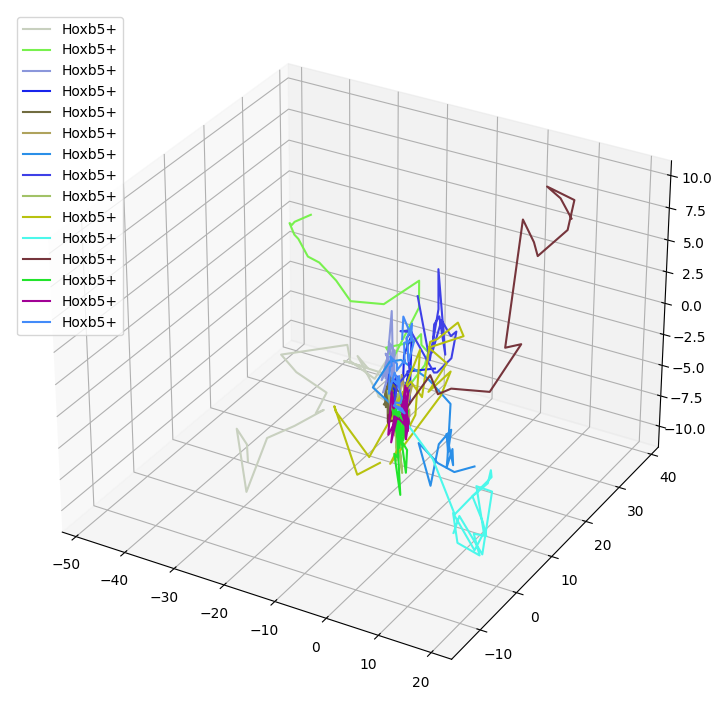

In [215]:
### homeostasis plot, NOT separating Hoxb5+ and Hoxb5+Vwf+

#removing TRACKS THAT ARE TOO SHORT
#print(my_list_hoxb5vwf)
remove_list =[]
grouped=data.groupby(['Track_ID'])
print(grouped)
for i, newdf in grouped:
    if len(newdf.index) <=18:
        print(i,'PBM')
        remove_list.append(i) #137
    else:
        print(i, 'no problem')


# print(len(remove_list), remove_list)

# print(len(data))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

my_list_hoxb5 = np.unique(data['Track_ID'])
print(len(my_list_hoxb5))

#Plotting the tracks 

for a in my_list_hoxb5:
    data1= data[(data['Track_ID'] == a)].sort_values(by=['Metadata_Timepoint'])#Make sure not a string 
#    if len(data1['Metadata_Timepoint'])>2
    if a not in remove_list :
        X1= data1['corrected_x_2']
        Y1= data1['corrected_y_2']
        Z1= data1['corrected_z_2']
        r= random.random()
        b= random.random()
        g= random.random()
        ax.plot(X1, Y1, Z1, label='Hoxb5+', c=(r,g,b))
        
    #    ax.set_xlim(-15, 20)
    #    ax.set_ylim(-20, 30)
    #    ax.set_zlim(-20, 10)    
        # ax.set_xlim(-65, 85)
        # ax.set_ylim(-125, 25)
        # ax.set_zlim(-4, 4)
        ax.legend(loc='upper left')

        # Set figure width to 12 and height to 9
        fig_size = plt.rcParams["figure.figsize"]
        fig_size[0] = 12
        fig_size[1] = 9
        plt.rcParams["figure.figsize"] = fig_size
        print ("New size:", fig_size)


In [ ]:
#grouped=merged_df.groupby(['Metadata_VWF'])
# for i in grouped:
#     my_list_hoxb5 = np.unique(data['Intensity_MaxIntensity_track'])
# print(data['AcquisitionTime'], data['Time of treatment'])
# print(newdf[newdf['Treatment']=='plt_depletion']['Time of treatment'].values[0])

# #REMOVING DUPLICATES from the merge 
# grouped=data.groupby(['Position_Name'])
# grouped #list of dataframes

# dflist=[]

# for i, newdf in grouped: #new df is grouped data franes
#    # print(i,df)
#     if newdf.shape[0]>1:
#         print(newdf.shape)

#         #if row has plt_depletion take time of treatment add acquisition time add to all rows in the group 
#         trmttime=newdf[newdf['Treatment']=='plt_depletion']['Time of treatment'].values[0]#numpy array, get the first value
#         #if trmttime > newdf['AcquisitionTime']:
#         newdf['TrueTreatment']=np.where(newdf['AcquisitionTime']<trmttime, 'Thomeostasis', 'Tdepletion')
#     else: 
#         newdf['TrueTreatment']="none"
#     dflist.append(newdf)
# xdf=pd.concat(dflist)

# xdf[~((xdf['Treatment'].str.contains("plt_depletion")) & (xdf['TrueTreatment'].str.contains("Thomeostasis")))]
# xdf[~((xdf['Treatment'].str.contains("homeostasis")) & (xdf['TrueTreatment'].str.contains("Tdepletion")))]

# print('data drop duplicates', len(xdf))
# data=xdf

VWF_043_MS211126_m4-homeostasismovie_2_P12+_1.5259021893143654e-05 PBM
VWF_043_MS211126_m4-homeostasismovie_2_P12+_3.051804378628731e-05 PBM
VWF_043_MS211126_m4-homeostasismovie_2_P1<3_1.5259021893143654e-05 no problem
VWF_043_MS211126_m4-homeostasismovie_2_P7++_1.5259021893143654e-05 PBM
VWF_043_MS211126_m4-homeostasismovie_2_P7++_3.051804378628731e-05 no problem
VWF_043_MS211126_m4-homeostasismovie_2_P7++_4.577706567943096e-05 PBM
VWF_043_MS211126_m4-homeostasismovie_2_P7++_6.103608757257462e-05 PBM
VWF_043_MS211126_m4-homeostasismovie_2_P7++_7.629510946571827e-05 PBM
VWF_048_MS220118_M3_movie2homeostasis_P12+_0.000106813153252 PBM
VWF_048_MS220118_M3_movie2homeostasis_P12+_1.5259021893143654e-05 PBM
VWF_048_MS220118_M3_movie2homeostasis_P12+_3.051804378628731e-05 PBM
VWF_048_MS220118_M3_movie2homeostasis_P12+_4.577706567943096e-05 PBM
VWF_048_MS220118_M3_movie2homeostasis_P12+_6.103608757257462e-05 PBM
VWF_048_MS220118_M3_movie2homeostasis_P12+_7.629510946571827e-05 PBM
VWF_048_MS22

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_3364/2268747829.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


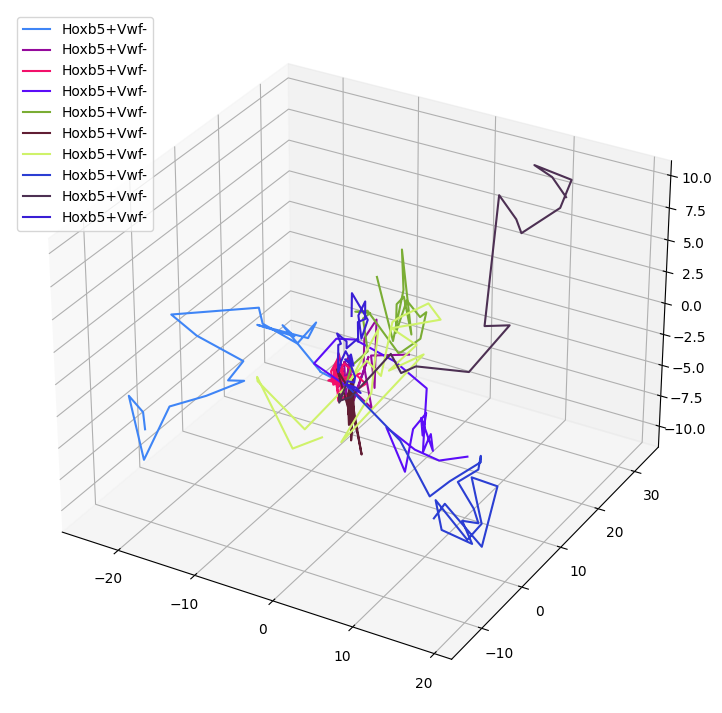

In [219]:
### homeostasis plot, separating Hoxb5+Vwf-


#removing TRACKS THAT ARE TOO SHORT
#print(my_list_hoxb5vwf)
remove_list =[]
grouped=data.groupby(['Track_ID'])
print(grouped)
for i, newdf in grouped:
    if len(newdf.index) <=19:
        print(i,'PBM')
        remove_list.append(i) #137
    else:
        print(i, 'no problem')


print(len(remove_list))

# remove_list.append(['VWF_043_MS211126_m4-homeostasismovie_2_P7++_3.05e-05', 'VWF_049_MS220201_M1_Snap_movie5depletion_P10spot_1.53e-05'])


print(len(data))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

my_list_hoxb5 = np.unique(data['Track_ID'])
print(len(my_list_hoxb5))

#Plotting the tracks 

for a in my_list_hoxb5:
    data1= data[(data['Track_ID'] == a)].sort_values(by=['Metadata_Timepoint'])#Make sure not a string 
#    if len(data1['Metadata_Timepoint'])>2
    if a not in remove_list and a not in Hoxb5Vwf_list:
        X1= data1['corrected_x_2']
        Y1= data1['corrected_y_2']
        Z1= data1['corrected_z_2']
        r= random.random()
        b= random.random()
        g= random.random()
        ax.plot(X1, Y1, Z1, label='Hoxb5+Vwf-', c=(r,g,b))
        
    #    ax.set_xlim(-15, 20)
    #    ax.set_ylim(-20, 30)
    #    ax.set_zlim(-20, 10)    
        # ax.set_xlim(-65, 85)
        # ax.set_ylim(-125, 25)
        # ax.set_zlim(-4, 4)
        ax.legend(loc='upper left')

        # Set figure width to 12 and height to 9
        fig_size = plt.rcParams["figure.figsize"]
        fig_size[0] = 12
        fig_size[1] = 9
        plt.rcParams["figure.figsize"] = fig_size
        print ("New size:", fig_size)


VWF_043_MS211126_m4-homeostasismovie_2_P12+_1.5259021893143654e-05 PBM
VWF_043_MS211126_m4-homeostasismovie_2_P12+_3.051804378628731e-05 PBM
VWF_043_MS211126_m4-homeostasismovie_2_P1<3_1.5259021893143654e-05 no problem
VWF_043_MS211126_m4-homeostasismovie_2_P7++_1.5259021893143654e-05 PBM
VWF_043_MS211126_m4-homeostasismovie_2_P7++_3.051804378628731e-05 no problem
VWF_043_MS211126_m4-homeostasismovie_2_P7++_4.577706567943096e-05 PBM
VWF_043_MS211126_m4-homeostasismovie_2_P7++_6.103608757257462e-05 PBM
VWF_043_MS211126_m4-homeostasismovie_2_P7++_7.629510946571827e-05 PBM
VWF_048_MS220118_M3_movie2homeostasis_P12+_0.000106813153252 PBM
VWF_048_MS220118_M3_movie2homeostasis_P12+_1.5259021893143654e-05 PBM
VWF_048_MS220118_M3_movie2homeostasis_P12+_3.051804378628731e-05 PBM
VWF_048_MS220118_M3_movie2homeostasis_P12+_4.577706567943096e-05 PBM
VWF_048_MS220118_M3_movie2homeostasis_P12+_6.103608757257462e-05 PBM
VWF_048_MS220118_M3_movie2homeostasis_P12+_7.629510946571827e-05 PBM
VWF_048_MS22

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_3364/4293078266.py:10: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


New size: [12, 9]


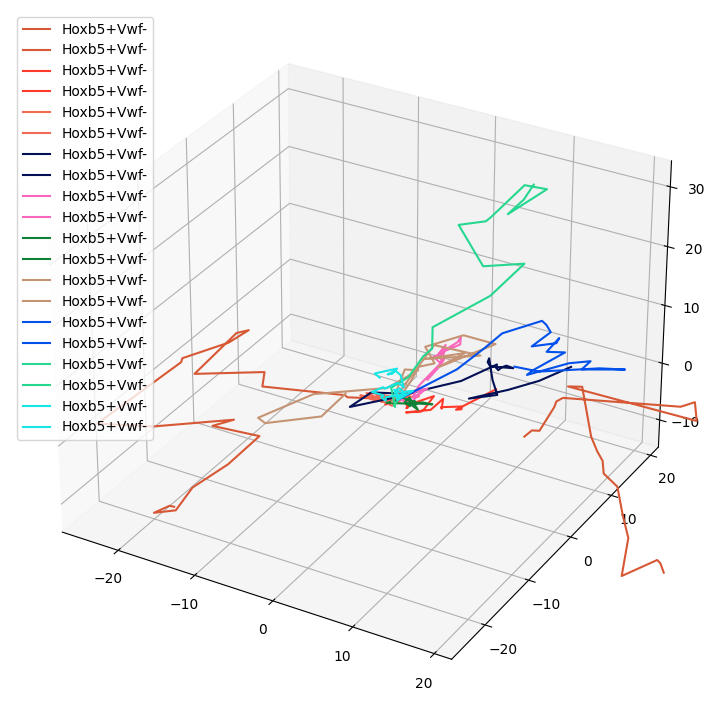

In [220]:
##COLOR BY 
#
from matplotlib import cm

# removing TRACKS THAT ARE TOO SHORT
#print(my_list_hoxb5vwf)
remove_list =[]
grouped=data.groupby(['Track_ID'])
print(grouped)
for i, newdf in grouped:
    if len(newdf.index) <=19:
        print(i,'PBM')
        remove_list.append(i) #137
    else:
        print(i, 'no problem')


print(len(remove_list))

# remove_list.append(['VWF_043_MS211126_m4-homeostasismovie_2_P7++_3.05e-05', 'VWF_049_MS220201_M1_Snap_movie5depletion_P10spot_1.53e-05'])


print(len(data))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

my_list_hoxb5 = np.unique(data['Track_ID'])
print(len(my_list_hoxb5))

#Plotting the tracks 

for a in my_list_hoxb5:
    data1= data[(data['Track_ID'] == a)].sort_values(by=['Metadata_Timepoint'])#Make sure not a string 
#    if len(data1['Metadata_Timepoint'])>2
    if a not in remove_list and a not in Hoxb5Vwf_list:
        X1= data1['corrected_x_2']
        Y1= data1['corrected_y_2']
        Z1= data1['corrected_z_2']
        depX=np.ma.masked_where(data1['corrected_x_2']>2, data1['corrected_x_2'])
        homX=np.ma.masked_where(data1['corrected_x_2']<2, data1['corrected_x_2'])
        XX=np.ma.masked_where(data1['corrected_x_2']==2, data1['corrected_x_2'])
        r= random.random()
        b= random.random()
        g= random.random()
        ax.plot(homX, depX, Y1, Z1, label='Hoxb5+Vwf-', c=(r,b,g))
        
    #    ax.set_xlim(-15, 20)
    #    ax.set_ylim(-20, 30)
    #    ax.set_zlim(-20, 10)    
        # ax.set_xlim(-65, 85)
        # ax.set_ylim(-125, 25)
        # ax.set_zlim(-4, 4)
        ax.legend(loc='upper left')

        # Set figure width to 12 and height to 9
        fig_size = plt.rcParams["figure.figsize"]
        fig_size[0] = 12
        fig_size[1] = 9
        plt.rcParams["figure.figsize"] = fig_size
        print ("New size:", fig_size)


VWF_043_MS211126_m4-homeostasismovie_2_P12+_1.5259021893143654e-05 PBM
VWF_043_MS211126_m4-homeostasismovie_2_P12+_3.051804378628731e-05 PBM
VWF_043_MS211126_m4-homeostasismovie_2_P1<3_1.5259021893143654e-05 no problem
VWF_043_MS211126_m4-homeostasismovie_2_P7++_1.5259021893143654e-05 PBM
VWF_043_MS211126_m4-homeostasismovie_2_P7++_3.051804378628731e-05 no problem
VWF_043_MS211126_m4-homeostasismovie_2_P7++_4.577706567943096e-05 PBM
VWF_043_MS211126_m4-homeostasismovie_2_P7++_6.103608757257462e-05 PBM
VWF_043_MS211126_m4-homeostasismovie_2_P7++_7.629510946571827e-05 PBM
VWF_048_MS220118_M3_movie2homeostasis_P12+_0.000106813153252 PBM
VWF_048_MS220118_M3_movie2homeostasis_P12+_1.5259021893143654e-05 PBM
VWF_048_MS220118_M3_movie2homeostasis_P12+_3.051804378628731e-05 PBM
VWF_048_MS220118_M3_movie2homeostasis_P12+_4.577706567943096e-05 PBM
VWF_048_MS220118_M3_movie2homeostasis_P12+_6.103608757257462e-05 PBM
VWF_048_MS220118_M3_movie2homeostasis_P12+_7.629510946571827e-05 PBM
VWF_048_MS22

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_3364/1727903377.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


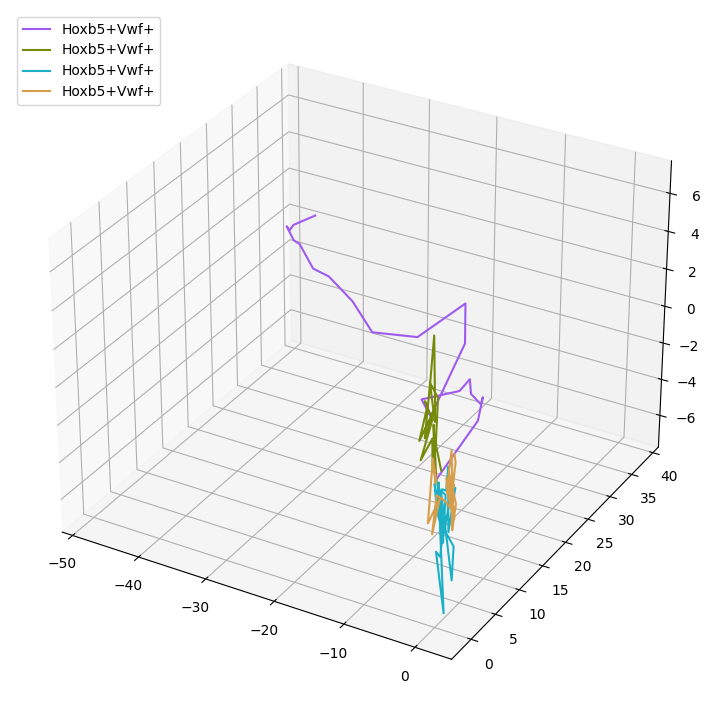

In [223]:
###post depletion plot Hoxb5+ Vwf+ 

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

remove_list =[]
grouped=data.groupby(['Track_ID'])
print(grouped)
for i, newdf in grouped:
    if len(newdf.index) <=19:
        print(i,'PBM')
        remove_list.append(i) #137
    # elif newdf['Intensity_MaxIntensity_track'][i].astype(str).str.endswith('0.0'): #didn't work
    #     remove_list.append(i)
    else:
        print(i, 'no problem')

#    ax.set_xlim(-30, 30)
#    ax.set_ylim(-20, 50)
#    ax.set_zlim(-20, 30)
# my_list_dep_hoxb5vwf = ['VWF_043_MS211126_m4-homeostasismovie_2_P7++_3.05e-05', 'VWF_049_MS220201_M1_Snap_movie5depletion_P10spot_1.53e-05']

for a in Hoxb5Vwf_list:
    data1= data[(data['Track_ID'] == a)].sort_values(by=['Metadata_Timepoint'])#Make sure not a string 
    if a not in remove_list:
        X1= data1['corrected_x_2']
        Y1= data1['corrected_y_2']
        Z1= data1['corrected_z_2']
        r= random.random()
        b= random.random()
        g= random.random()
        ax.plot(X1, Y1, Z1, label='Hoxb5+Vwf+', c=(r,g,b))

        #    ax.set_xlim(-15, 20)
        #    ax.set_ylim(-20, 30)
        #    ax.set_zlim(-20, 10)    
        # ax.set_xlim(-65, 85)
        # ax.set_ylim(-125, 25)
        # ax.set_zlim(-4, 4)
        ax.legend(loc='upper left')

        # Set figure width to 12 and height to 9
        fig_size = plt.rcParams["figure.figsize"]
        fig_size[0] = 12
        fig_size[1] = 9
        plt.rcParams["figure.figsize"] = fig_size
        print ("New size:", fig_size)



New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]


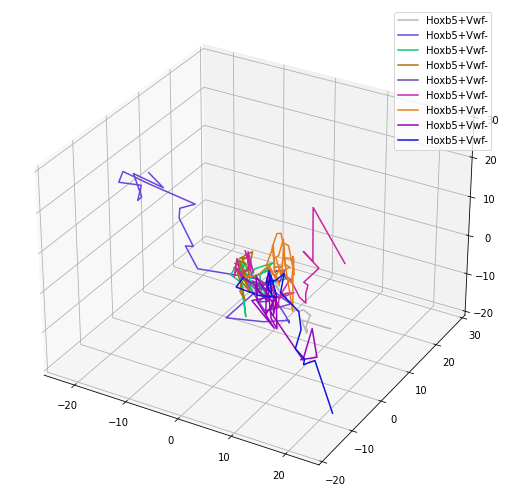

In [6]:
###post depletion plot Hoxb5+Vwf-

fig = plt.figure()
ax = fig.gca(projection='3d')

my_list_dep_hoxb5 = [14.2, 11.2, 9.3, 12.1,14.3, 17.1, 17.3, 17.4, 17.5]

for a in my_list_dep_hoxb5:
    data1= data[(data['cell_ID'] == a)]
    X1= data1['relative_x']
    Y1= data1['relative_y']
    Z1= data1['relative_z']
    r= random.random()
    b= random.random()
    g= random.random()
    ax.plot(X1, Y1, Z1, label='Hoxb5+Vwf-', c=(r,g,b))
    ax.set_xlim(-25, 25)
    ax.set_ylim(-20, 30)
    ax.set_zlim(-20, 30)   
    ax.legend()    
    
    ax.legend()

    # Set figure width to 12 and height to 9
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 9
    plt.rcParams["figure.figsize"] = fig_size
    print ("New size:", fig_size)

 


New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]


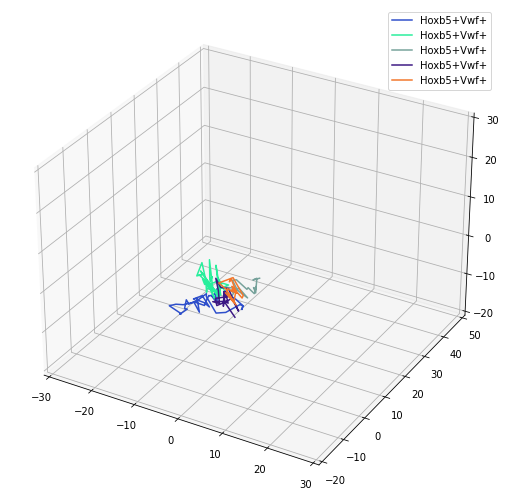

In [5]:
###24h post depletion plot Hoxb5+ Vwf+ 

fig = plt.figure()
ax = fig.gca(projection='3d')
#2.1, 6.1, 1.22, 14.1
my_list_dep_hoxb5vwf = [13.1, 13.2, 18.1, 18.2, 18.3]

for a in my_list_dep_hoxb5vwf:
    data1= data[(data['cell_ID'] == a)]
    X1= data1['relative_x']
    Y1= data1['relative_y']
    Z1= data1['relative_z']
    r= random.random()
    b= random.random()
    g= random.random()
    ax.plot(X1, Y1, Z1, label='Hoxb5+Vwf+', c=(r,g,b))
    
    ax.set_xlim(-30, 30)
    ax.set_ylim(-20, 50)
    ax.set_zlim(-20, 30)    
    ax.legend()

    # Set figure width to 12 and height to 9
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 9
    plt.rcParams["figure.figsize"] = fig_size
    print ("New size:", fig_size)



New size: [12, 9]
New size: [12, 9]
New size: [12, 9]


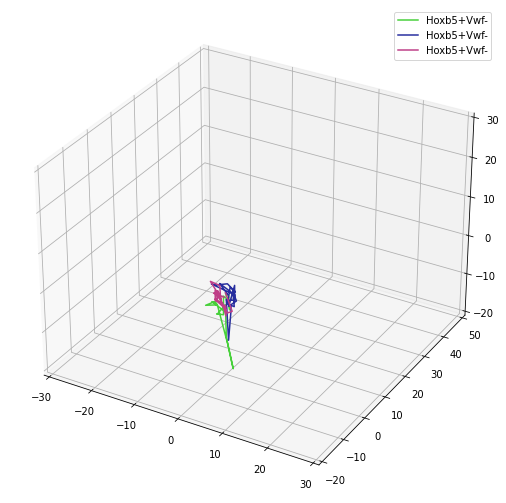

In [14]:
###24h post depletion plot Hoxb5+Vwf-

fig = plt.figure()
ax = fig.gca(projection='3d')

my_list_dep_hoxb5 = [16.1, 18.4, 19.1]

for a in my_list_dep_hoxb5:
    data1= data[(data['cell_ID'] == a)]
    X1= data1['relative_x']
    Y1= data1['relative_y']
    Z1= data1['relative_z']
    r= random.random()
    b= random.random()
    g= random.random()
    ax.plot(X1, Y1, Z1, label='Hoxb5+Vwf-', c=(r,g,b))
    ax.set_xlim(-30, 30)
    ax.set_ylim(-20, 50)
    ax.set_zlim(-20, 30)   
    ax.legend()    
    
    ax.legend()

    # Set figure width to 12 and height to 9
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 9
    plt.rcParams["figure.figsize"] = fig_size
    print ("New size:", fig_size)



New size: [12, 9]


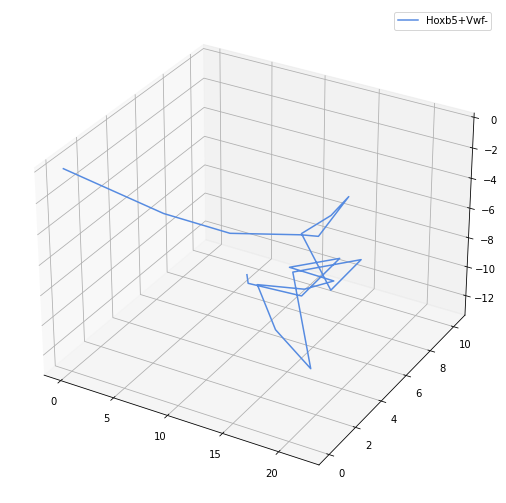

In [17]:

track_length=0
print(track_length)

my_list_dep_hoxb5vwf = [2.1, 6.1]
range_of_i = range(2,23)

for a in my_list_dep_hoxb5vwf:
    data1= data[(data['cell_ID'] == a)]
    i= data1.frame
    for i in range_of_i:
        data1.tracklength=track_length
        track_length=track_length+mt.sqrt(((data1.x[i]-data1.x[i-1])**2)+((data1.y[i]-data1.y[i-1])**2)+((data1.z[i]-data1.z[i-1])**2))
        #track_length_df=pd.DataFrame(track_length)
        #print(track_length)


print(data.tracklength)   
#data.tracklength.to_csv('track.tsv','\t')



In [43]:
#i=data.frame
#print(i)

#print(data['cell_ID'] == 11.2)

data = pd.read_csv('/Volumes/LUIS1_MS/Experiments/IVM_tracks.csv', header = 0)
print(data)

            x  relative_x        y  relative_y         z  relative_z  frame  \
0    1068.220       0.000  327.353       0.000  27.77760      0.0000      1   
1    1067.730      -0.490  327.636       0.283  27.78840      0.0108      2   
2    1069.680       1.460  328.081       0.728  28.46300      0.6854      3   
3    1069.680       1.460  329.026       1.673  28.41970      0.6421      4   
4    1067.730      -0.490  329.433       2.080  27.18380     -0.5938      5   
..        ...         ...      ...         ...       ...         ...    ...   
417   881.113     -41.987  147.775      29.832  11.22700      0.0000     18   
418   875.323     -47.777  152.921      34.978   8.55963      0.0000     19   
419   874.770     -48.330  155.125      37.182   6.79874      0.0000     20   
420   876.980     -46.120  154.776      36.833   5.98209      0.0000     21   
421   876.980     -46.120  158.930      40.987   7.76605      0.0000     22   

                                                  f

In [ ]:
### Single Hoxb5+  track for Tiago

fig = plt.figure()
ax = fig.gca(projection='3d')

my_list_hoxb5 = [3.4]

for a in my_list_hoxb5:
    data1= data[(data['cell_ID'] == a)]
    X1= data1['relative_x']
    Y1= data1['relative_y']
    Z1= data1['relative_z']
    r= random.random()
    b= random.random()
    g= random.random()
    ax.plot(X1, Y1, Z1, label='Hoxb5+Vwf-', c=(r,g,b))
    ax.set_xlim(-20, 20)
    ax.set_ylim(-2, 13)
    ax.set_zlim(-12, 2)
    
    ax.legend()

    # Set figure width to 12 and height to 9
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 9
    plt.rcParams["figure.figsize"] = fig_size
    print ("New size:", fig_size)

New size: [12, 9]


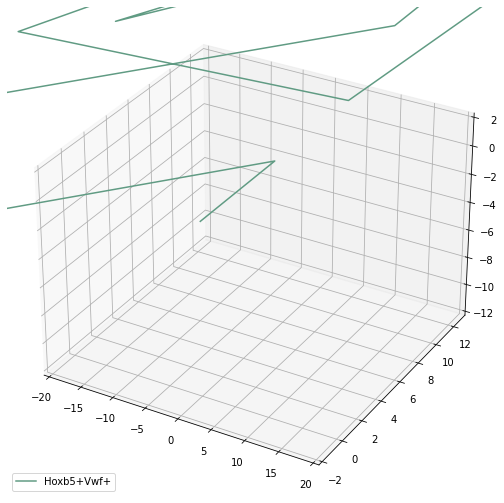

In [39]:
### single Hoxb5+Vwf+ track for Tiago #3.3

fig = plt.figure()
ax = fig.gca(projection='3d')


my_list_hoxb5vwf = [10.1]

for a in my_list_hoxb5vwf:
    data1= data[(data['cell_ID'] == a)]
    X1= data1['relative_x']
    Y1= data1['relative_y']
    Z1= data1['relative_z']
    r= random.random()
    b= random.random()
    g= random.random()
    ax.plot(X1, Y1, Z1, label='Hoxb5+Vwf+', c=(r,g,b))
    ax.set_xlim(-20, 20)
    ax.set_ylim(-2, 13)
    ax.set_zlim(-12, 2)
    
    ax.legend()

    # Set figure width to 12 and height to 9
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 9
    plt.rcParams["figure.figsize"] = fig_size
    print ("New size:", fig_size)


New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]


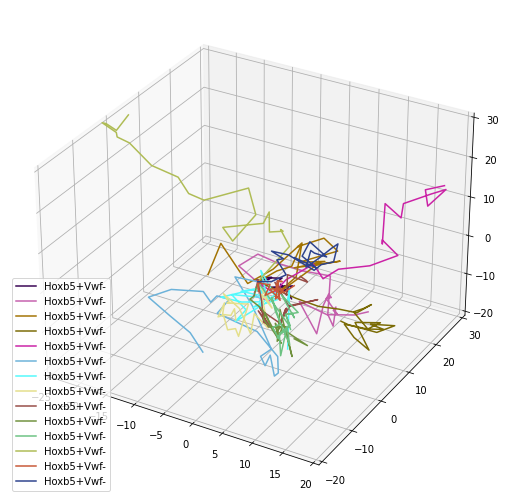

In [9]:
### homeostasis plot, separating Hoxb5+ and Hoxb5+Vwf+ CHANGING THE AXIS

fig = plt.figure()
ax = fig.gca(projection='3d')

my_list_hoxb5 = [1.1, 3.1, 3.2, 3.4, 3.5, 3.6, 7.1, 8.1, 8.2, 9.1, 9.2, 10.1, 1.4, 3.11]

for a in my_list_hoxb5:
    data1= data[(data['cell_ID'] == a)]
    X1= data1['relative_x']
    Y1= data1['relative_y']
    Z1= data1['relative_z']
    r= random.random()
    b= random.random()
    g= random.random()
    ax.plot(X1, Y1, Z1, label='Hoxb5+Vwf-', c=(r,g,b))
    
    ax.set_xlim(-25, 20)
    ax.set_ylim(-20, 30)
    ax.set_zlim(-20, 30)
    ax.legend()
    
    # Set figure width to 12 and height to 9
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 9
    plt.rcParams["figure.figsize"] = fig_size
    print ("New size:", fig_size)



New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]


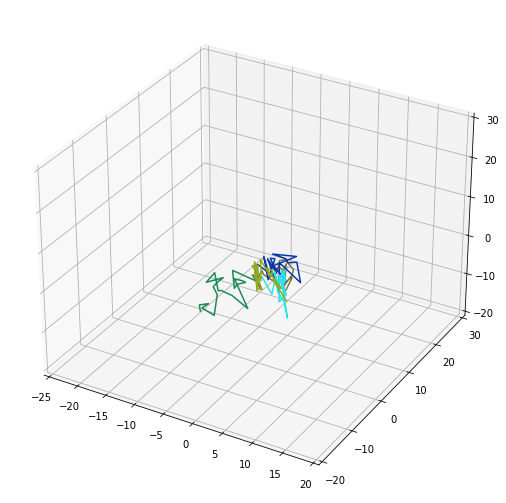

In [9]:
### homeostasis plot, separating Hoxb5+ and Hoxb5+Vwf+ FOR POSTER FIGURE NO LEGEND

fig = plt.figure()
ax = fig.gca(projection='3d')

my_list_hoxb5vwf = [1.2,1.3, 3.3, 4.1, 5.1]

for a in my_list_hoxb5vwf:
    data1= data[(data['cell_ID'] == a)]
    X1= data1['relative_x']
    Y1= data1['relative_y']
    Z1= data1['relative_z']
    r= random.random()
    b= random.random()
    g= random.random()
    ax.plot(X1, Y1, Z1, c=(r,g,b))
    
    ax.set_xlim(-25, 20)
    ax.set_ylim(-20, 30)
    ax.set_zlim(-20, 30)


    # Set figure width to 12 and height to 9
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 9
    plt.rcParams["figure.figsize"] = fig_size
    print ("New size:", fig_size)

